In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('DH_FEB_2015_Phase2.csv')
ds.head()

,Unnamed: 0,Date,Author,Vertical,Headline,Description
0,0,FEB 01 2015,-,50-50-WC-Cricket,Tigers face tough test of survival,Bangladesh will need a dramatic turn in fortun...
1,1,FEB 01 2015,"Annapurna Singh, NEW DELHI, Feb 01, 2015, DHNS,",-,Gems and jewellery sector poised for sops from...,With a high employment generation and export p...
2,2,FEB 01 2015,"MUMBAI, Feb 01, 2015, DHNS and Agencies,",-,Sun-Ranbaxy deal gets FTC nod,Sun Pharmaceuticals has won approval from the ...
3,3,FEB 01 2015,"ATHENS, Feb 01, 2015, Reuters,",-,Greek government says will not cooperate with ...,Greece’s new leftist government opened talks o...
4,4,FEB 01 2015,"Hrithik Kiran Bagade, Bengaluru, Feb 01, 2015,...",-,Karnataka illustrates a place in animation glory,"ABAI, a non-profit body promoting the animatio..."


In [3]:
# Checking the shape of the dataset
print ('\nShape of dataset:', ds.shape)


Shape of dataset: (4678, 6)


In [4]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (4678, 6)
Shape of dataset after removing duplicates:  (4678, 6)


In [5]:
ds.columns

Index(['Unnamed: 0', 'Date', 'Author', 'Vertical', 'Headline', 'Description'], dtype='object')

In [6]:
ds.dtypes

Unnamed: 0      int64
Date           object
Author         object
Vertical       object
Headline       object
Description    object
dtype: object

In [7]:
# Checking the dataset columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 4677
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4678 non-null   int64 
 1   Date         4678 non-null   object
 2   Author       4678 non-null   object
 3   Vertical     4678 non-null   object
 4   Headline     4678 non-null   object
 5   Description  4678 non-null   object
dtypes: int64(1), object(5)
memory usage: 255.8+ KB


In [8]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32'])
ds_int.columns

Index(['Unnamed: 0'], dtype='object')

In [9]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['Date', 'Author', 'Vertical', 'Headline', 'Description'], dtype='object')

In [10]:
ds.describe()

,Unnamed: 0
count,4678.000000
mean,2338.500000
std,1350.566609
min,0.000000
25%,1169.250000
50%,2338.500000
75%,3507.750000
max,4677.000000


In [11]:
ds.isnull().sum()

Unnamed: 0     0
Date           0
Author         0
Vertical       0
Headline       0
Description    0
dtype: int64

In [12]:
ds.isna().sum()

Unnamed: 0     0
Date           0
Author         0
Vertical       0
Headline       0
Description    0
dtype: int64

In [13]:
ds.dropna(inplace=True)

#ds.replace(np.NaN, None, inplace=True)

<AxesSubplot:>

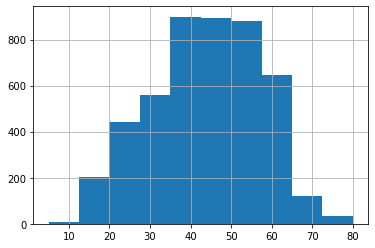

In [14]:
ds['Headline'].str.len().hist()

count    4678.000000
mean       57.074391
std       101.101270
min         1.000000
25%        26.000000
50%        33.000000
75%        42.000000
max      1353.000000
Name: Description, dtype: float64


<AxesSubplot:>

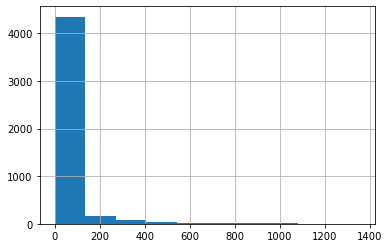

In [15]:
lens = ds.Description.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

<AxesSubplot:>

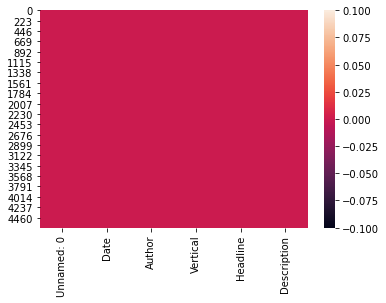

In [16]:
sns.heatmap(ds.isnull())

In [17]:
ds['Headline'].unique()

array(['Tigers face tough test of survival',
       'Gems and jewellery sector poised for sops from Budget',
       'Sun-Ranbaxy deal gets FTC nod', ...,
       'Does growth lead to political success?',
       "'This Budget has provided vision and resources'",
       'Trailer to achchhe din?'], dtype=object)

In [18]:
# Convert all messages to lowercase
ds['Description'] =  ds.Description.str.lower()

In [19]:
ds['Description_len'] = ds.Description.str.len()
ds.head()

,Unnamed: 0,Date,Author,Vertical,Headline,Description,Description_len
0,0,FEB 01 2015,-,50-50-WC-Cricket,Tigers face tough test of survival,bangladesh will need a dramatic turn in fortun...,200
1,1,FEB 01 2015,"Annapurna Singh, NEW DELHI, Feb 01, 2015, DHNS,",-,Gems and jewellery sector poised for sops from...,with a high employment generation and export p...,227
2,2,FEB 01 2015,"MUMBAI, Feb 01, 2015, DHNS and Agencies,",-,Sun-Ranbaxy deal gets FTC nod,sun pharmaceuticals has won approval from the ...,177
3,3,FEB 01 2015,"ATHENS, Feb 01, 2015, Reuters,",-,Greek government says will not cooperate with ...,greece’s new leftist government opened talks o...,190
4,4,FEB 01 2015,"Hrithik Kiran Bagade, Bengaluru, Feb 01, 2015,...",-,Karnataka illustrates a place in animation glory,"abai, a non-profit body promoting the animatio...",174


In [20]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

In [21]:
stop_words =  (stopwords.words('english'))

In [22]:
# remove stopwords

ds['Description'] = ds['Description'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [23]:
# remove digits and the texts that contains digits

ds['Description'] = ds['Description'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [24]:
# remove the repeatative words

ds['Description'] = ds['Description'].apply(lambda x: x.split(',,,')[0])

In [25]:
# Remove punctuations

ds['Description'] = ds['Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [26]:
# remove extra spaces from data

ds['Description'] = ds['Description'].apply(lambda x: re.sub(' +',' ',x))

In [27]:
ds['Author'] = ds['Author'].apply(lambda x: re.sub('^[\w+\s+\w+\,]','', x))

In [28]:
ds['Description_len_clean'] = ds.Description.str.len()
ds.head()

,Unnamed: 0,Date,Author,Vertical,Headline,Description,Description_len,Description_len_clean
0,0,FEB 01 2015,-,50-50-WC-Cricket,Tigers face tough test of survival,bangladesh need dramatic turn fortunes ensure ...,200,137
1,1,FEB 01 2015,"nnapurna Singh, NEW DELHI, Feb 01, 2015, DHNS,",-,Gems and jewellery sector poised for sops from...,high employment generation export potential in...,227,173
2,2,FEB 01 2015,"UMBAI, Feb 01, 2015, DHNS and Agencies,",-,Sun-Ranbaxy deal gets FTC nod,sun pharmaceuticals approval federal trade com...,177,129
3,3,FEB 01 2015,"THENS, Feb 01, 2015, Reuters,",-,Greek government says will not cooperate with ...,greece’s new leftist government opened talks b...,190,152
4,4,FEB 01 2015,"rithik Kiran Bagade, Bengaluru, Feb 01, 2015, ...",-,Karnataka illustrates a place in animation glory,abai nonprofit body promoting animation sector...,174,137


In [29]:
for index,text in enumerate(ds['Description'][35:37]):
  print('Description of Data %d:\n'%(index+1),text)

Description of Data 1:
 
Description of Data 2:
 decision nda government appealing favourable verdict received british telecom company vodafone bombay high court transfer pricing dispute tax demands rs crore subsequent circular central board direct taxes cbdt directing field officers follow logic judgement similar disputes reassure foreign investors government’s principled stand henceforth would heed decisions courts appellate tribunals disputes definite signal wants country known predictable tax regime estimated cbdt directive could help resolve two dozen disputes similar tax demands would also mean fresh demand would raised officers based reasoning followed vodafone case


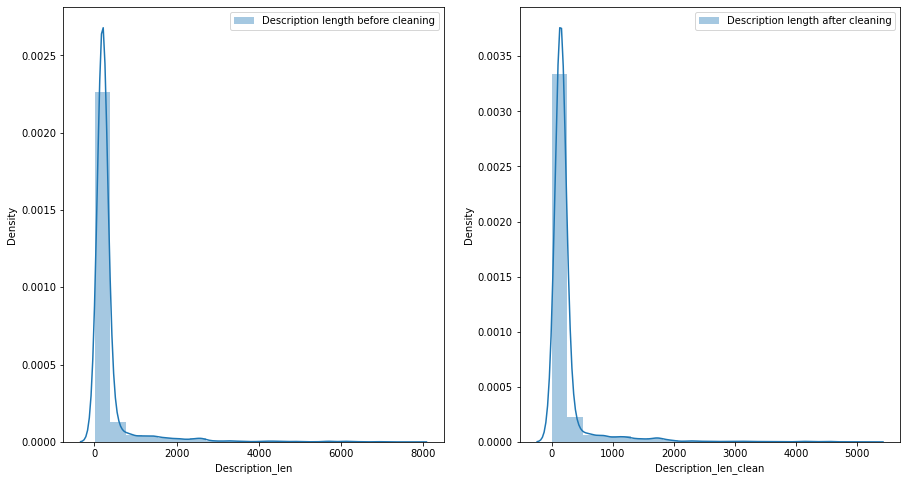

In [30]:
# Message Distribution before cleaning

f, ax = plt.subplots(1,2, figsize = (15, 8))

sns.distplot(ds['Description_len'], bins=20, ax=ax[0], label = 'Description length before cleaning')
ax[0].set_label ('Description length before cleaning')
ax[0].legend()

sns.distplot(ds['Description_len_clean'], bins=20, ax=ax[1], label = 'Description length after cleaning')
ax[1].set_label ('Description length after cleaning')
ax[1].legend()

In [31]:
# Getting sense of loud words in spam
from wordcloud import WordCloud

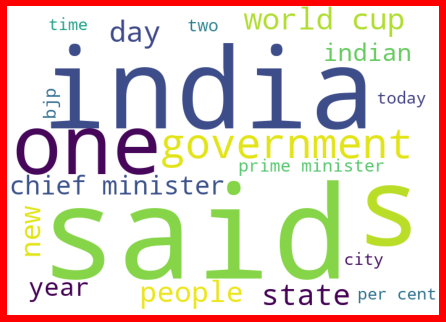

In [32]:
description = ds['Description'] 
desc_cloud = WordCloud(width=700, height=500, background_color='white', max_words=20).generate(' '.join(description))

plt.figure(figsize = (6, 6), facecolor='r')
plt.imshow(desc_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
ds.head()

,Unnamed: 0,Date,Author,Vertical,Headline,Description,Description_len,Description_len_clean
0,0,FEB 01 2015,-,50-50-WC-Cricket,Tigers face tough test of survival,bangladesh need dramatic turn fortunes ensure ...,200,137
1,1,FEB 01 2015,"nnapurna Singh, NEW DELHI, Feb 01, 2015, DHNS,",-,Gems and jewellery sector poised for sops from...,high employment generation export potential in...,227,173
2,2,FEB 01 2015,"UMBAI, Feb 01, 2015, DHNS and Agencies,",-,Sun-Ranbaxy deal gets FTC nod,sun pharmaceuticals approval federal trade com...,177,129
3,3,FEB 01 2015,"THENS, Feb 01, 2015, Reuters,",-,Greek government says will not cooperate with ...,greece’s new leftist government opened talks b...,190,152
4,4,FEB 01 2015,"rithik Kiran Bagade, Bengaluru, Feb 01, 2015, ...",-,Karnataka illustrates a place in animation glory,abai nonprofit body promoting animation sector...,174,137


In [34]:
ds.drop(columns=['Description_len', 'Description_len_clean'], inplace=True)

In [35]:
ds.head()

,Unnamed: 0,Date,Author,Vertical,Headline,Description
0,0,FEB 01 2015,-,50-50-WC-Cricket,Tigers face tough test of survival,bangladesh need dramatic turn fortunes ensure ...
1,1,FEB 01 2015,"nnapurna Singh, NEW DELHI, Feb 01, 2015, DHNS,",-,Gems and jewellery sector poised for sops from...,high employment generation export potential in...
2,2,FEB 01 2015,"UMBAI, Feb 01, 2015, DHNS and Agencies,",-,Sun-Ranbaxy deal gets FTC nod,sun pharmaceuticals approval federal trade com...
3,3,FEB 01 2015,"THENS, Feb 01, 2015, Reuters,",-,Greek government says will not cooperate with ...,greece’s new leftist government opened talks b...
4,4,FEB 01 2015,"rithik Kiran Bagade, Bengaluru, Feb 01, 2015, ...",-,Karnataka illustrates a place in animation glory,abai nonprofit body promoting animation sector...


In [36]:
ds.shape

(4678, 6)

In [37]:
ds.to_csv('news_phase_2.csv')